# Breast Cancer Survival Prediction Data wrangling




In this notebook we will load, define and clean the data loaded from https://ieee-dataport.org/open-access/seer-breast-cancer-data#files

In [86]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

### 1-1: Data collection 

In [2]:
#load the dataset
file_name = '../data/SEER_Breast_Cancer_Dataset.csv'
df_raw = pd.read_csv(file_name)

In [3]:
#display the sample of data
df_raw.head()

Age                                              Race   \
0   43  Other (American Indian/AK Native, Asian/Pacifi...   
1   47  Other (American Indian/AK Native, Asian/Pacifi...   
2   67                                              White   
3   46                                              White   
4   63                                              White   

                   Marital Status  Unnamed: 3 T Stage  N Stage 6th Stage  \
0  Married (including common law)         NaN       T2      N3      IIIC   
1  Married (including common law)         NaN       T2      N2      IIIA   
2  Married (including common law)         NaN       T2      N1       IIB   
3                        Divorced         NaN       T1      N1       IIA   
4  Married (including common law)         NaN       T2      N2      IIIA   

                                 Grade   A Stage  Tumor Size Estrogen Status  \
0  Moderately differentiated; Grade II  Regional          40        Positive   
1  Moderately differentiated; Grade II  Regional          45        Positive   
2     Poorly differentiated; Grade III  Regional          25        Positive   
3  Moderately differentiated; Grade II  Regional          19        Positive   
4  Moderately differentiated; Grade II  Regional          35        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      19                     11   
1            Positive                      25                      9   
2            Positive                       4                      1   
3            Positive                      26                      1   
4            Positive                      21                      5   

   Survival Months Status  
0                1  Alive  
1                2  Alive  
2                2   Dead  
3                2   Dead  
4                3   Dead

In [4]:
#get the summary of data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [5]:
#drop the empty column 
df_raw.drop(columns = ['Unnamed: 3'], inplace = True)

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

In [7]:
#confirm there is no missing data
missing = pd.concat([df_raw.isnull().sum(axis=1), 100 * df_raw.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing['%'].unique()

array([0.])

### 1-2: Data Definition 

As seen in the info above, there are 10 categorical columns and 5 numerical columns.
There seems to be no null value for all the records.


To be abale to do proper statical analysis we are going to convert the categorical columns to numberical data

In [8]:
#check the columns name 
df_raw.columns

Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [9]:
#fix "Race" and "T Stage" column name and remove the space 
df = df_raw.rename(columns={'Race ':'Race','T Stage ':'T Stage'})

In [10]:
#all the columns with object datatype 
objetc_columns = df.dtypes[df.dtypes == object]
objetc_columns.index

Index(['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'Grade',
       'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status'],
      dtype='object')

In [11]:
#exploring all the columns to get the unique values 
df['Race'].unique()

array(['Other (American Indian/AK Native, Asian/Pacific Islander)',
       'White', 'Black'], dtype=object)

In [12]:
#get the distributaion of different values
df['Race'].value_counts()

White                                                        3413
Other (American Indian/AK Native, Asian/Pacific Islander)     320
Black                                                         291
Name: Race, dtype: int64

In [13]:
df['Marital Status'].unique()

array(['Married (including common law)', 'Divorced',
       'Single (never married)', 'Widowed', 'Separated'], dtype=object)

In [14]:
df['Marital Status'].value_counts()

Married (including common law)    2643
Single (never married)             615
Divorced                           486
Widowed                            235
Separated                           45
Name: Marital Status, dtype: int64

In [15]:
df['T Stage'].unique()

array(['T2', 'T1', 'T3', 'T4'], dtype=object)

In [16]:
df['T Stage'].value_counts()

T2    1786
T1    1603
T3     533
T4     102
Name: T Stage, dtype: int64

In [17]:
df['N Stage'].unique()

array(['N3', 'N2', 'N1'], dtype=object)

In [18]:
df['N Stage'].value_counts()

N1    2732
N2     820
N3     472
Name: N Stage, dtype: int64

In [19]:
df['A Stage'].unique()

array(['Regional', 'Distant'], dtype=object)

In [20]:
df['A Stage'].value_counts()

Regional    3932
Distant       92
Name: A Stage, dtype: int64

In [21]:
df['6th Stage'].unique()

array(['IIIC', 'IIIA', 'IIB', 'IIA', 'IIIB'], dtype=object)

In [22]:
df['6th Stage'].value_counts()

IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: 6th Stage, dtype: int64

In [23]:
df['Grade'].unique()

array(['Moderately differentiated; Grade II',
       'Poorly differentiated; Grade III', 'Well differentiated; Grade I',
       'Undifferentiated; anaplastic; Grade IV'], dtype=object)

In [24]:
df['Grade'].value_counts()

Moderately differentiated; Grade II       2351
Poorly differentiated; Grade III          1111
Well differentiated; Grade I               543
Undifferentiated; anaplastic; Grade IV      19
Name: Grade, dtype: int64

In [25]:
df['Estrogen Status'].unique()

array(['Positive', 'Negative'], dtype=object)

In [26]:
df['Estrogen Status'].value_counts()

Positive    3755
Negative     269
Name: Estrogen Status, dtype: int64

In [27]:
df['Progesterone Status'].unique()

array(['Positive', 'Negative'], dtype=object)

In [28]:
df['Progesterone Status'].value_counts()

Positive    3326
Negative     698
Name: Progesterone Status, dtype: int64

In [29]:
df['Status'].unique()

array(['Alive', 'Dead'], dtype=object)

In [30]:
df['Status'].value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

### 1-3: Data Cleaning

In [31]:
#convert the all categorical columns data to numeric as below:
cleanup_nums = { 'Race': {'White':1, 'Black':2, 'Other (American Indian/AK Native, Asian/Pacific Islander)':3},
                 'Marital Status':{'Single (never married)':1, 'Married (including common law)':2,'Separated':3,'Divorced':4,'Widowed':5},
                 'T Stage':{'T1':1, 'T2':2, 'T3':3, 'T4':4},
                 'N Stage':{'N1':1, 'N2':2, 'N3':3},
                 '6th Stage':{'IIA':1, 'IIB':2, 'IIIA':1, 'IIIB':2, 'IIIC':3}, 
                 'Grade':{'Moderately differentiated; Grade II':2, 'Poorly differentiated; Grade III':3, 'Well differentiated; Grade I':1, 'Undifferentiated; anaplastic; Grade IV':4},
                 'A Stage':{'Regional':1, 'Distant':2}, 
                 'Estrogen Status':{'Positive':1,'Negative':2}, 
                 'Progesterone Status':{'Positive':1,'Negative':2}, 
                 'Status':{'Alive':1,'Dead':0}}


In [32]:
df.replace(cleanup_nums, inplace=True)

In [80]:
df.head()

Age  Race  Marital Status  T Stage  N Stage  6th Stage  Grade  A Stage  \
0   43     3               2        2        3          3      2        1   
1   47     3               2        2        2          1      2        1   
2   67     1               2        2        1          2      3        1   
3   46     1               4        1        1          1      2        1   
4   63     1               2        2        2          1      2        1   

   Tumor Size  Estrogen Status  Progesterone Status  Regional Node Examined  \
0          40                1                    1                      19   
1          45                1                    1                      25   
2          25                1                    1                       4   
3          19                1                    1                      26   
4          35                1                    1                      21   

   Reginol Node Positive  Survival Months  Status  
0                     11                1       1  
1                      9                2       1  
2                      1                2       0  
3                      1                2       0  
4                      5                3       0

In [34]:
#confirm all the categorical data are converted to numberical data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int64
 2   Marital Status          4024 non-null   int64
 3   T Stage                 4024 non-null   int64
 4   N Stage                 4024 non-null   int64
 5   6th Stage               4024 non-null   int64
 6   Grade                   4024 non-null   int64
 7   A Stage                 4024 non-null   int64
 8   Tumor Size              4024 non-null   int64
 9   Estrogen Status         4024 non-null   int64
 10  Progesterone Status     4024 non-null   int64
 11  Regional Node Examined  4024 non-null   int64
 12  Reginol Node Positive   4024 non-null   int64
 13  Survival Months         4024 non-null   int64
 14  Status                  4024 non-null   int64
dtypes: int64(15)
memory u

In [35]:
df.describe().T

count       mean        std   min   25%   50%   75%  \
Age                     4024.0  53.972167   8.963134  30.0  47.0  54.0  61.0   
Race                    4024.0   1.231362   0.580485   1.0   1.0   1.0   1.0   
Marital Status          4024.0   2.275099   1.047524   1.0   2.0   2.0   2.0   
T Stage                 4024.0   1.784791   0.765531   1.0   1.0   2.0   2.0   
N Stage                 4024.0   1.438370   0.693479   1.0   1.0   1.0   2.0   
6th Stage               4024.0   1.532058   0.695475   1.0   1.0   1.0   2.0   
Grade                   4024.0   2.150596   0.638234   1.0   2.0   2.0   3.0   
A Stage                 4024.0   1.022863   0.149485   1.0   1.0   1.0   1.0   
Tumor Size              4024.0  30.473658  21.119696   1.0  16.0  25.0  38.0   
Estrogen Status         4024.0   1.066849   0.249791   1.0   1.0   1.0   1.0   
Progesterone Status     4024.0   1.173459   0.378691   1.0   1.0   1.0   1.0   
Regional Node Examined  4024.0  14.357107   8.099675   1.0   9.0  14.0  19.0   
Reginol Node Positive   4024.0   4.158052   5.109331   1.0   1.0   2.0   5.0   
Survival Months         4024.0  71.297962  22.921430   1.0  56.0  73.0  90.0   
Status                  4024.0   0.846918   0.360111   0.0   1.0   1.0   1.0   

                          max  
Age                      69.0  
Race                      3.0  
Marital Status            5.0  
T Stage                   4.0  
N Stage                   3.0  
6th Stage                 3.0  
Grade                     4.0  
A Stage                   2.0  
Tumor Size              140.0  
Estrogen Status           2.0  
Progesterone Status       2.0  
Regional Node Examined   61.0  
Reginol Node Positive    46.0  
Survival Months         107.0  
Status                    1.0

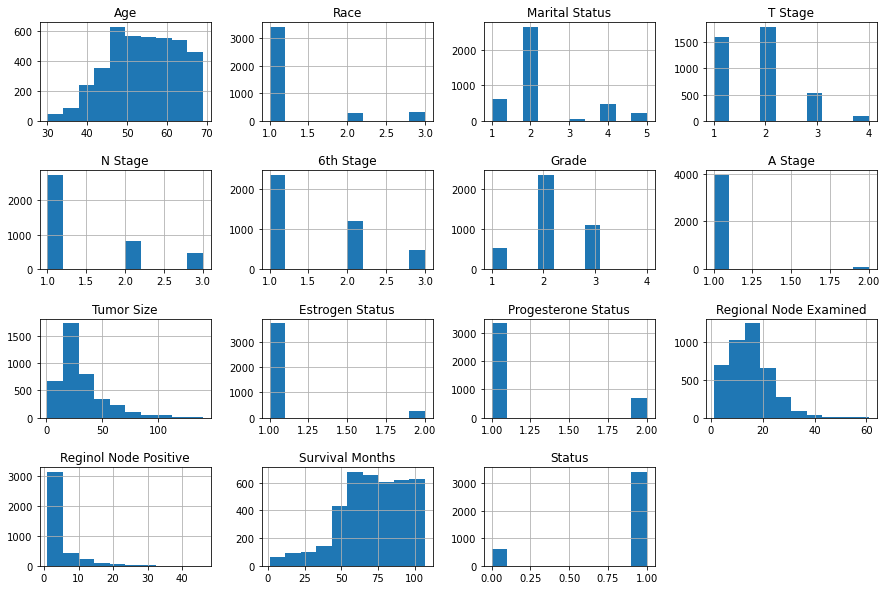

In [36]:
#Plot Distributions Of Feature Values
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

### Note:
Looking at the plots, there seems to be no outliers for any features. 

In [37]:
#Using pandas ProfileReport to visualize the features and their correlations
profile = ProfileReport(df, title="Pandas Profiling Report")
profile_report = df.profile_report(html={'style': {'full_width': True}})
profile_report.to_file("../data-report.html")


Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
profile_report

#### In this section we calculate the percentage of alive people in different categories

In [57]:
df.groupby('Race')['Status'].mean()*100

Race
1    85.057134
2    74.914089
3    89.687500
Name: Status, dtype: float64

In [62]:
(df.groupby('Age')['Status'].mean()*100).sort_values(ascending= False)

Age
54    92.968750
34    92.857143
48    90.714286
56    90.151515
35    90.000000
57    89.583333
60    89.285714
45    89.215686
53    89.032258
40    88.888889
47    88.819876
44    88.607595
43    88.043478
42    87.804878
41    87.323944
51    87.162162
55    87.012987
49    85.802469
37    85.714286
46    85.276074
59    85.034014
32    84.615385
61    83.916084
36    83.333333
52    83.050847
63    83.006536
68    81.981982
64    81.896552
50    81.250000
65    81.147541
62    80.536913
67    79.831933
58    77.500000
39    76.923077
66    75.630252
38    73.333333
33    73.333333
31    71.428571
69    68.518519
30    60.000000
Name: Status, dtype: float64

In [63]:
(df.groupby('N Stage')['Status'].mean()*100).sort_values(ascending= False)

N Stage
1    90.117130
2    79.878049
3    61.652542
Name: Status, dtype: float64

In [64]:
(df.groupby('6th Stage')['Status'].mean()*100).sort_values(ascending= False)

6th Stage
1    88.110403
2    87.050961
3    61.652542
Name: Status, dtype: float64

In [65]:
df.groupby('6th Stage')['Status'].mean()*100

6th Stage
1    88.110403
2    87.050961
3    61.652542
Name: Status, dtype: float64

After analyzing the data and all the features and records, it seems the data set is ready for exploratory data analysing, therefore we will save the data for more investigation.

In [89]:
fpath = '../data/bc_data_cleaned.csv'
df.to_csv(fpath, index=False)